In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import re
from pickle import dump, load
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity


In [3]:
books_new = pd.read_csv('E:\\Neoron\\Programming_Practice\\Machine_Learning_Project\\Book Recomendation system\\DATA\\books_new.csv')
books = pd.read_csv('E:\\Neoron\\Programming_Practice\\Machine_Learning_Project\\Book Recomendation system\\DATA\\books.csv')

In [4]:
#join the two dataframes

df = books
df['SubGenre'] = books_new['SubGenre']


In [5]:
# shape of the dataframe
print("Shape of the dataframe:", df.shape)

Shape of the dataframe: (211, 6)


In [6]:
# columns in the dataframe
print("Columns in the dataframe:", df.columns)

Columns in the dataframe: Index(['Title', 'Author', 'Genre', 'Height', 'Publisher', 'SubGenre'], dtype='object')


In [7]:
# cheek info of the dataframe
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211 entries, 0 to 210
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Title      211 non-null    object
 1   Author     187 non-null    object
 2   Genre      211 non-null    object
 3   Height     211 non-null    int64 
 4   Publisher  115 non-null    object
 5   SubGenre   211 non-null    object
dtypes: int64(1), object(5)
memory usage: 10.0+ KB
None


In [8]:
# cheek for missing values
print("Missing values in the dataframe:\n",df.isnull().sum())

Missing values in the dataframe:
 Title         0
Author       24
Genre         0
Height        0
Publisher    96
SubGenre      0
dtype: int64


In [9]:
# cheek for duplicate values
print("Duplicate values in the dataframe:", df.duplicated().sum())

Duplicate values in the dataframe: 0


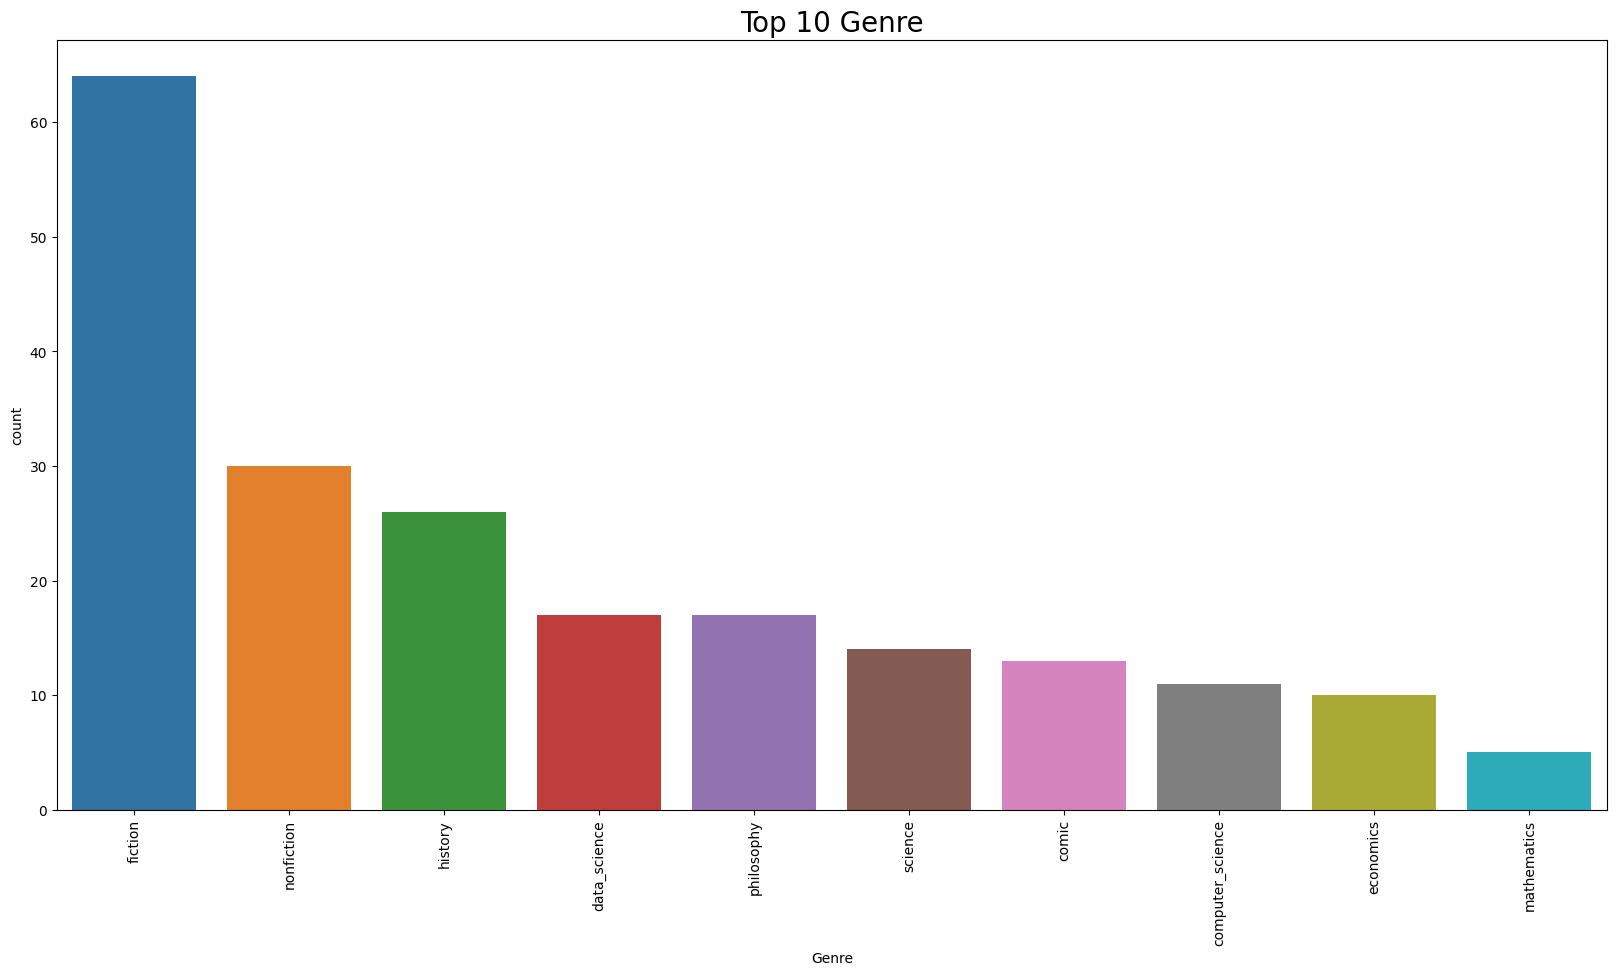

In [10]:
# visualization of Genre column

plt.figure(figsize=(20,10))
sns.countplot(x='Genre', data=df, order=df['Genre'].value_counts().index[:10])
plt.xticks(rotation=90)
plt.title('Top 10 Genre', fontsize=20)
plt.show()

### comment: 
1. most of the books are from fiction genre
2. second most books are from non-fiction genre


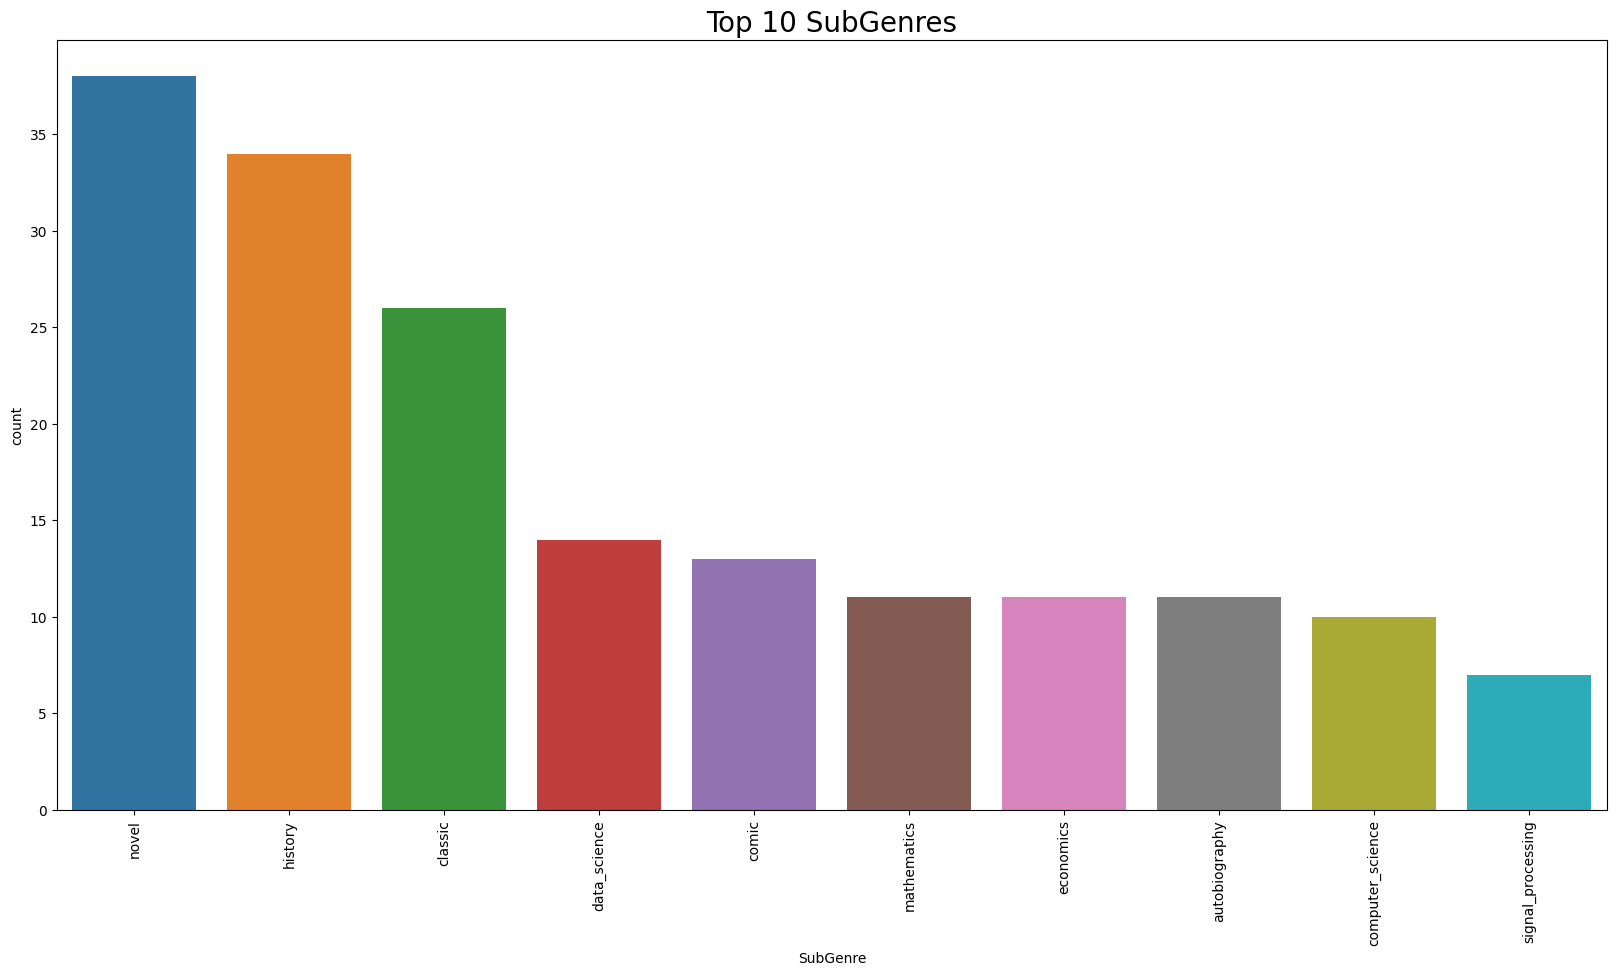

In [12]:
# visualization of Sub_Genre column

plt.figure(figsize=(20,10))
sns.countplot(x='SubGenre', data=df, order=df['SubGenre'].value_counts().index[:10])
plt.xticks(rotation=90)
plt.title('Top 10 SubGenres', fontsize=20)
plt.show()

### comment: 

1. most of the books are from History sub-genre
2. second most books are from classic sub-genre

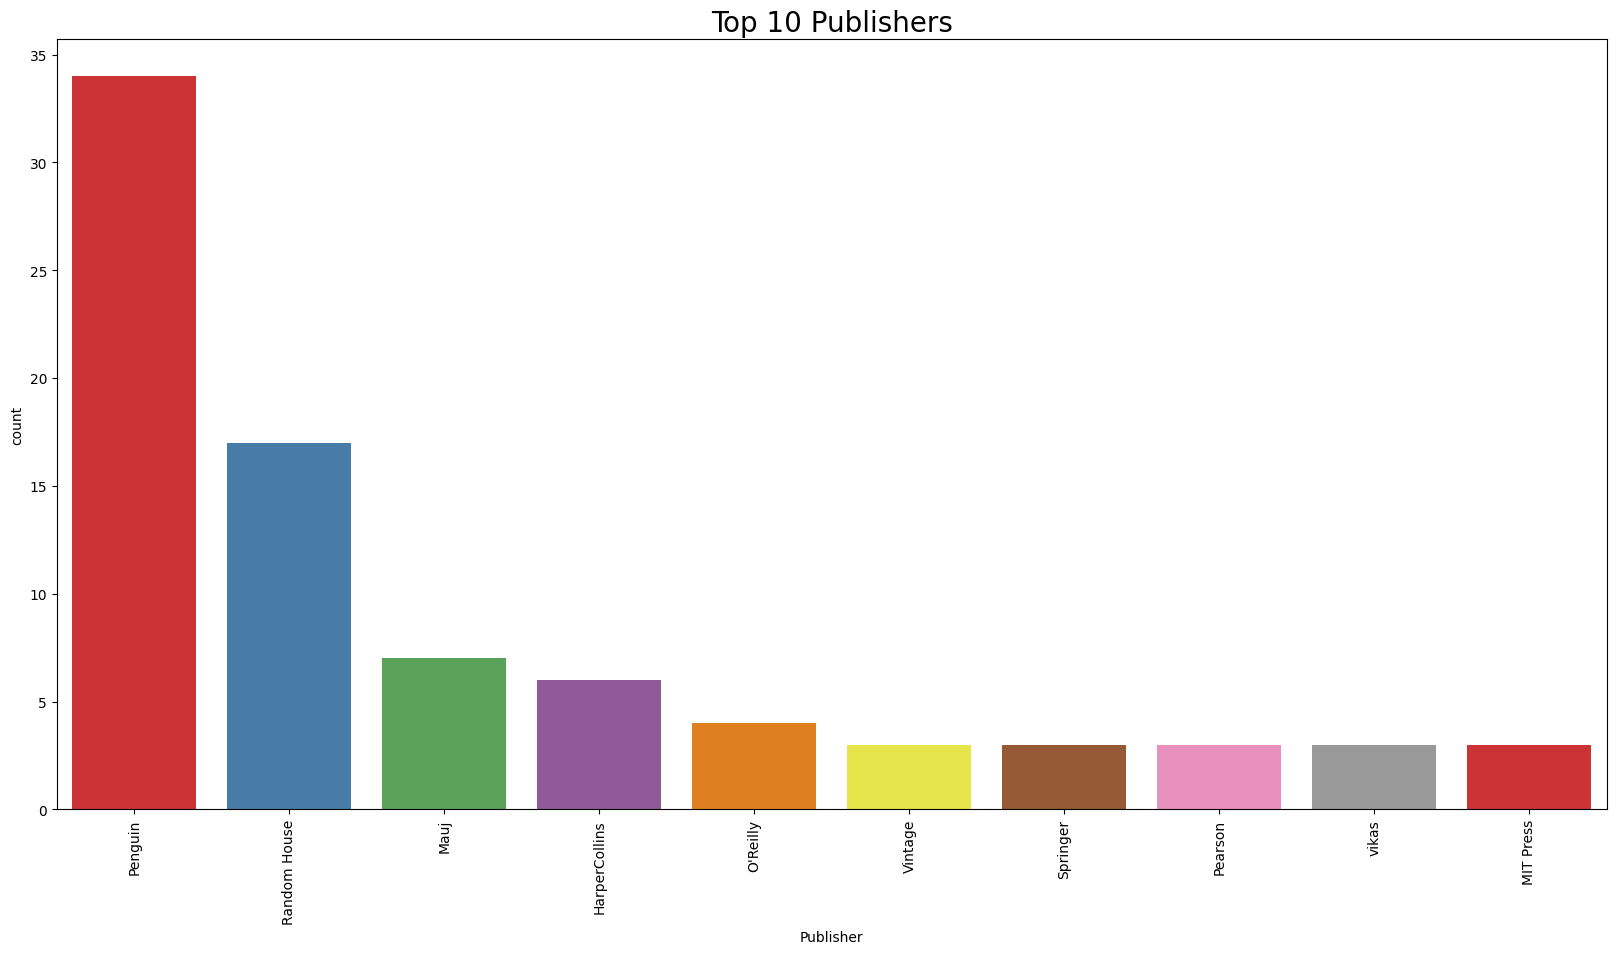

In [13]:
# visualization of Publisher column

plt.figure(figsize=(20,10))
sns.countplot(x='Publisher', data=df, order=df['Publisher'].value_counts().index[:10], palette='Set1')
plt.xticks(rotation=90)
plt.title('Top 10 Publishers', fontsize=20)    
plt.show()

### comment:

1. most of the publishers are from Penguin sub-genre
2. second most publishers are from random house sub-genre

In [14]:

stopwords= set(['br', 'the', 'i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"])




# preprocessing categorical column

def preprocess_numeric_data(dataframe):
  
  dataframe["Height"] = pd.to_numeric(dataframe["Height"])

  return dataframe


#preprocessing numerical column

def preprocess_text_data(dataframe):

    
      
    
    dataframe["Title"] = dataframe["Title"].str.replace("[^a-zA-Z0-9 ]", "", regex=True)
    dataframe["Title"] = dataframe["Title"].astype(str).apply(lambda sentence: ' '.join(e.lower() for e in sentence.split() if e.lower() not in stopwords and len(e.lower())>1))
    dataframe["Title"] = dataframe["Title"].str.replace("\s+", " ", regex=True)
    

    dataframe["Author"] = dataframe["Author"].str.replace("[^a-zA-Z0-9 ]", "", regex=True)
    dataframe["Author"] = dataframe["Author"].str.lower()
    dataframe["Author"] = dataframe["Author"].str.replace("\s+", " ", regex=True)
    


    dataframe["Genre"] = dataframe["Genre"].str.replace("[^a-zA-Z0-9 ]", "", regex=True)
    dataframe["Genre"] = dataframe["Genre"].str.lower()
    dataframe["Genre"] = dataframe["Genre"].str.replace("\s+", " ", regex=True)
    

    dataframe["Publisher"] = dataframe["Publisher"].str.replace("[^a-zA-Z0-9 ]", "", regex=True)
    dataframe["Publisher"] = dataframe["Publisher"].str.lower()
    dataframe["Publisher"] = dataframe["Publisher"].str.replace("\s+", " ", regex=True)
    


    dataframe["SubGenre"] = dataframe["SubGenre"].str.replace("[^a-zA-Z0-9 ]", "", regex=True)
    dataframe["SubGenre"] = dataframe["SubGenre"].str.lower()
    dataframe["SubGenre"] = dataframe["SubGenre"].str.replace("\s+", " ", regex=True)
    
    return dataframe
      
      

In [15]:
numerical_freture = preprocess_numeric_data(df)


In [16]:
# Shape of the numerical_freture
print("Shape of the numerical_freture:", numerical_freture.shape)

Shape of the numerical_freture: (211, 6)


In [17]:
categorical_feature = preprocess_text_data(df)

In [18]:
# Shape of the categorical_feature
print("Shape of the categorical_feature:", categorical_feature.shape)

Shape of the categorical_feature: (211, 6)


In [19]:
df

,Title,Author,Genre,Height,Publisher,SubGenre
0,fundamentals wavelets,goswami jaideva,signalprocessing,228,wiley,signalprocessing
1,data smart,foreman john,datascience,235,wiley,datascience
2,god created integers,hawking stephen,mathematics,197,penguin,mathematics
3,superfreakonomics,dubner stephen,economics,179,harpercollins,economics
4,orientalism,said edward,history,197,penguin,history
...,...,...,...,...,...,...
206,structure randomness,tao terence,mathematics,252,NaN,mathematics
207,image processing matlab,eddins steve,signalprocessing,241,NaN,signalprocessing
208,animal farm,orwell george,fiction,180,NaN,classic
209,idiot,dostoevsky fyodor,fiction,197,NaN,classic


***Visualizing the remaining features with their shapes in each dataframe***

In [20]:
print('Whole Dataframes columns are :', list(df.columns))

Whole Dataframes columns are : ['Title', 'Author', 'Genre', 'Height', 'Publisher', 'SubGenre']


Observation:


*   After preprocessing data, we have 210 entries present


***Saving processed files***

In [25]:
df.to_csv('E:\\Neoron\\Programming_Practice\\Machine_Learning_Project\\Book Recomendation system\\DATA\\data.csv')

In [21]:
vectorizer_title_fc = TfidfVectorizer()
tfidf_title_fc = vectorizer_title_fc.fit_transform(df["Title"])

In [22]:
import pickle
vectorizer_title_fc = TfidfVectorizer()
tfidf_title_fc = vectorizer_title_fc.fit_transform(df['Title'])

file_path = "e:\\Neoron\\Programming_Practice\\Machine_Learning_Project\\Book Recomendation system\\EDA\\vectorizer_title_fc.pkl"
with open(file_path,"wb") as p:
    pickle.dump(vectorizer_title_fc,p)

file_path = "e:\\Neoron\\Programming_Practice\\Machine_Learning_Project\\Book Recomendation system\\EDA\\tfidf_title_fc.pkl"
with open(file_path,"wb") as p:
    pickle.dump(tfidf_title_fc,p)

In [23]:

with open("E:\\Neoron\\Programming_Practice\\Machine_Learning_Project\\Book Recomendation system\\EDA\\vectorizer_title_fc.pkl", "rb") as p:
    vectorizer_title_fc = load(p)    

with open("E:\\Neoron\\Programming_Practice\\Machine_Learning_Project\\Book Recomendation system\\EDA\\tfidf_title_fc.pkl", "rb") as p:
    tfidf_title_fc = load(p)

In [24]:
def top_5_similar_title_books(Title):
  query = Title
  query = re.sub("[^a-zA-Z0-9 ]", "", query.lower())
  query_vec = vectorizer_title_fc.transform([query])
  similarity = cosine_similarity(query_vec, tfidf_title_fc).flatten()
  indices = np.argpartition(similarity, -5)[-5:]
  results = df.iloc[indices]
  return results[["Title","Author","Genre","Publisher","SubGenre"]].reset_index(drop=True)


top_5_similar_title_books("The Hobbit")



,Title,Author,Genre,Publisher,SubGenre
0,idea justice,sen amartya,nonfiction,penguin,economics
1,raisin sun,hansberry lorraine,fiction,penguin,novel
2,sea poppies,ghosh amitav,fiction,penguin,novel
3,presidents men,woodward bob,history,random house,history
4,christmas carol,dickens charles,fiction,NaN,classic


In [25]:
def top_5_similar_title_books():
  query = input("Enter the Book Title : ")
  processed = re.sub("[^a-zA-Z0-9 ]", "", query.lower())
  query_vec = vectorizer_title_fc.transform([query])
  similarity = cosine_similarity(query_vec, tfidf_title_fc).flatten()
  indices = np.argpartition(similarity, -5)[-5:]
  results = df.iloc[indices]
  return results[["Title","Author","Genre","Publisher","SubGenre"]].reset_index(drop=True)



top_5_similar_title_books()

,Title,Author,Genre,Publisher,SubGenre
0,prisoner birth,archer jeffery,fiction,pan,novel
1,idea justice,sen amartya,nonfiction,penguin,economics
2,presidents men,woodward bob,history,random house,history
3,code book,singh simon,science,NaN,mathematics
4,oxford book modern science writing,dawkins richard,science,NaN,science


### Breakdwn avobe code


Here's a breakdown of your function:

1. **User Input:**
   - Accepts a book title as input from the user.

```python
query = str(input('Enter book title: '))
```

2. **Text Processing:**
   - Cleans and processes the input title by converting it to lowercase and removing non-alphanumeric characters.

```python
processed = re.sub("[^a-zA-Z0-9 ]", "", query.lower())
```

3. **Vectorization:**
   - Uses the provided `vectorizer` to transform the processed title into a vector.

```python
query_vec = vectorizer.transform([query])
```

4. **Cosine Similarity:**
   - Calculates the cosine similarity between the vectorized query and the pre-calculated TF-IDF matrix of book titles (`tfidf_title_fc`).

```python
similarity = cosine_similarity(query_vec, tfidf_title_fc).flatten()
```

5. **Top 5 Similar Books:**
   - Identifies the indices of the top 5 most similar books based on the cosine similarity scores.

```python
indices = np.argpartition(similarity, -5)[-5:]
```

6. **Results Extraction:**
   - Retrieves information about the top 5 similar books from the original dataframe (`df`) using the calculated indices.

```python
results = df.iloc[indices]
```

7. **Return:**
   - Returns a subset of the dataframe containing information about the top 5 similar books.

```python
return results[["Title", "Author", "Genre", "Publisher", "Sub_Genre"]]
```

Assuming `vectorizer_title_fc` is properly defined earlier in your code, you can call this function by using:

```python
top_5_similar_title_books(vectorizer_title_fc)
```

In [129]:
d = pd.read_csv('E:\\Neoron\\Programming_Practice\\Machine_Learning_Project\\Book Recomendation system\\DATA\\books_final.csv')
d.shape

(112, 6)